<a href="https://colab.research.google.com/github/utkar22/CSE508_Winter2023_A2_48/blob/main/IR_A2_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import math
import io
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/IR_A2

/content/drive/MyDrive/IR_A2


In [4]:
f = open("q3_clean.txt")
f_data = f.readlines()
f.close()

In [5]:
mat = []
sorted_mat = []

for line in f_data:
    curr = []
    line_list = line.split()
    curr.append(int(line_list[0]))

    for j in range(2,len(line_list)):
        j_list = line_list[j].split(":")
        curr.append(float(j_list[1]))

    mat.append(curr)
    sorted_mat.append(curr)

In [6]:
sorted_mat = sorted(sorted_mat, key=lambda x: -x[0])

In [7]:
count = [0,0,0,0]

for i in sorted_mat:
    count[i[0]]+=1

print(f"There can be {count[0]}! * {count[1]}! * {count[2]}! * {count[3]}! such files.")

There can be 59! * 26! * 17! * 1! such files.


Calculating the DCG by the formula: rel_1 + sum(rel_i/log(i))

In [8]:
def calculate_DCG(matrix, n):
    DCG = matrix[0][0]
    for i in range(1,n):
        DCG+= (matrix[i][0])/(math.log(i+1, 2))
        #print(matrix[i][0], DCG, i)
    return DCG

In [9]:
maximum_DCG = calculate_DCG(sorted_mat, len(sorted_mat))
print(f"The maximum DCG is {maximum_DCG}")

The maximum DCG is 20.989750804831445


In [32]:
f = open("IR_A3_Q3_out.txt", "w")

for i in sorted_mat:
    print(f"{i[0]} qid:4", file = f, end = " ")

    for j in range(1, len(i)):
        print(f"{j}:{i[j]}", file = f, end = " ")

    print(file = f)    

f.close()

In [10]:
nDCG_50 = calculate_DCG(mat, 50)/calculate_DCG(sorted_mat, 50)
nDCG_full = calculate_DCG(mat, len(mat))/calculate_DCG(sorted_mat, len(sorted_mat))

print(f"The nDCG at position 50 is {nDCG_50}")
print(f"The nDCG for the entire dataset is {nDCG_full}")

The nDCG at position 50 is 0.3521042740324887
The nDCG for the entire dataset is 0.5979226516897831


Plotting the Precision-Recall Curve

In [12]:
sorted_mat_75 = sorted(mat, key=lambda x: -x[75])

In [20]:
total_relevant = count[1] + count[2] + count[3]

precision = []
recall = []

count_curr = 0
count_relevant = 0
for i in mat:
    if i[0] > 0:
        count_relevant += 1
    count_curr += 1

    curr_p = count_relevant/count_curr
    curr_r = count_relevant/total_relevant

    precision.append(curr_p)
    recall.append(curr_r)

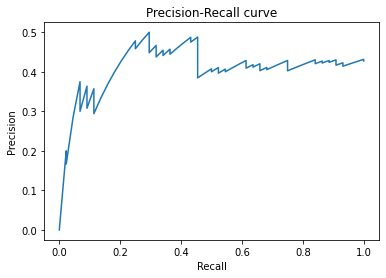

In [24]:
%matplotlib inline

plt.plot(recall, precision)
plt.title("Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()